In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import constants

import mplhep as hep
from utils.style import make_style
make_style()

Calibration report for `LASER-OPTRONIC DETECTOR MOD. 260`, June 11th, 1986. Continuous calibration 360-1100 nm

In [2]:
import pandas as pd
import awkward as ak

In [3]:
calib_data = pd.read_csv('../data/detector_calib.csv')

In [4]:
constants.c/532e-9/1e12

563.5196578947367

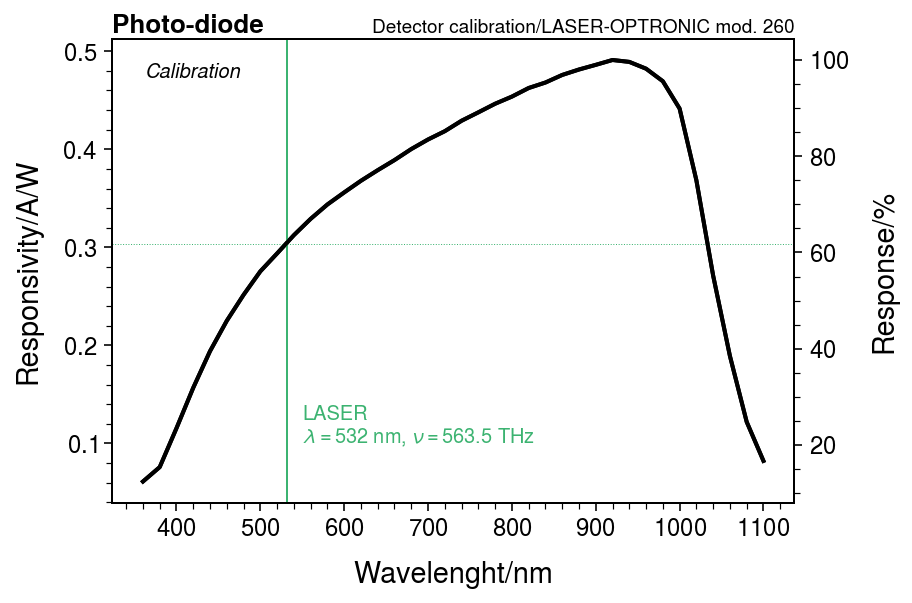

In [5]:
fig, ax = plt.subplots()

ax.plot(calib_data.wavelenght, calib_data.responsivity, 'k')
ax.set_xlabel('Wavelenght/nm')

ax2 = ax.twinx()
ax2.plot(calib_data.wavelenght, calib_data.response, 'k')
ax.set_ylabel('Responsivity/A/W')
ax2.set_ylabel('Response/%')
hep.label.exp_text('Photo-diode', 'Calibration', italic=(False, True), loc=3)
hep.atlas.lumitext('Detector calibration/LASER-OPTRONIC mod. 260')
ax.axvline(532, lw=1, color='mediumseagreen')
ax.text(550, 0.1, 'LASER\n$\lambda=532~ \mathrm{nm}$, $\\nu=563.5~ \mathrm{THz}$', color='mediumseagreen')
ax.axhline(0.3032754716981132, ls=':', lw=0.5, color='mediumseagreen')

plt.savefig('../figures/detector_calib.pdf', bbox_inches='tight')

In [6]:
rsp = calib_data[(calib_data['wavelenght']<600) & (calib_data['wavelenght']>500)].response

np.max(np.array(rsp.iloc[1:])-np.array(rsp.iloc[0:-1]))

3.8000000000000043

In [7]:
(0.2938*520 + 0.3124*540)/(1060)

0.3032754716981132